## Objective

Probem Statement:
Provided is the Dataset is of a Bank, which wants to know the precition of a customer leaving the Bank Organization or not. Based on the input provided Bank want to build a model to know the possibility of a given type of customer will be retained or will be leaving.
#Its an assumption that old people are restive to changes and they are likely to be loyal customer to bank, but young people may have varying preferences. Given the DOB and DOJ of a given customer will be helpful to predicit the behaviour.
#Number of of Services they are using from bank like Checking Account,Saving Account, Homeloan, Carloan, EducationLoan etc. Likely Customer once attached to a bank with long term loan services, he/she is unlikely to move out. This can be important parameter in model building So Banks provides attractive offeres for loan transfers from other bank to there bank
#Occupation Salary and Account Balance also plays major role in determining how weathlier is the customer, A Customer with no money is less important to Bank.

## Import Library 

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_curve,roc_auc_score,precision_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_learning_curves
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

In [36]:
pwd

'C:\\Users\\tkumar2\\Desktop\\data_science\\Mith_Exam'

## Read Train and Test Data

In [37]:
train_data=pd.read_excel("Train.xlsx")
test_data=pd.read_excel("Test.xlsx")

In [38]:
print(train_data.shape)
print(test_data.shape)

(7360, 21)
(1840, 20)


In [39]:
train_data.head(2)

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.0,2,1,0,189678.70,No
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.6,1,1,0,61936.22,No


In [40]:
# See target Varibale distribution
train_data.Churn.value_counts()

No     5868
Yes    1492
Name: Churn, dtype: int64

In [41]:
# Replace Target Variable -> Yes=1 and No =0 
train_data['Churn']=train_data['Churn'].replace("No",0)
train_data['Churn']=train_data['Churn'].replace("Yes",1)

In [42]:
train_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

# Summary

In [43]:
train_data.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360,7360,...,7360,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000
unique,7360,7360,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C3511555,Name_7231834,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,...,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3994,3693,...,2559,3207,3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,NaN,NaN,...,NaN,NaN,NaN,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,0.202717
std,NaN,NaN,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,NaN,NaN,...,NaN,NaN,NaN,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,0.402051
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,NaN,NaN,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,NaN,NaN,...,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,0.000000
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,...,NaN,NaN,NaN,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,0.000000
75%,NaN,NaN,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,NaN,NaN,...,NaN,NaN,NaN,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,0.000000


# Finding 

1) Many Account Balance are Zero <br>
2) No NA value Present in dataset

In [44]:
#pandas_profiling.ProfileReport(train_data)

## Plot Heat Map to See Missing Value in all column

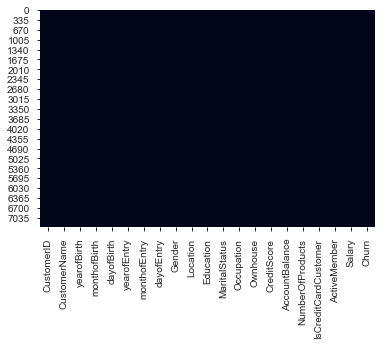

In [45]:
# heat map to See Missing value in train data columns
sns.heatmap(train_data.isnull(), cbar=False)
# 2 column can be delete

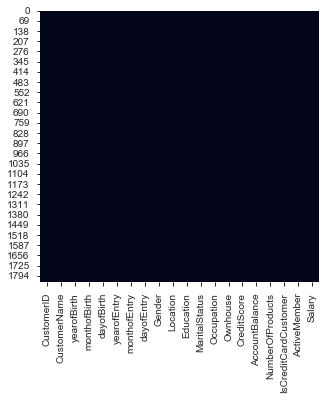

In [46]:
# heat map to See Missing value in test data column
plt.figure(figsize=(5,5))
sns.heatmap(test_data.isnull(), cbar=False)

## Corelation graph

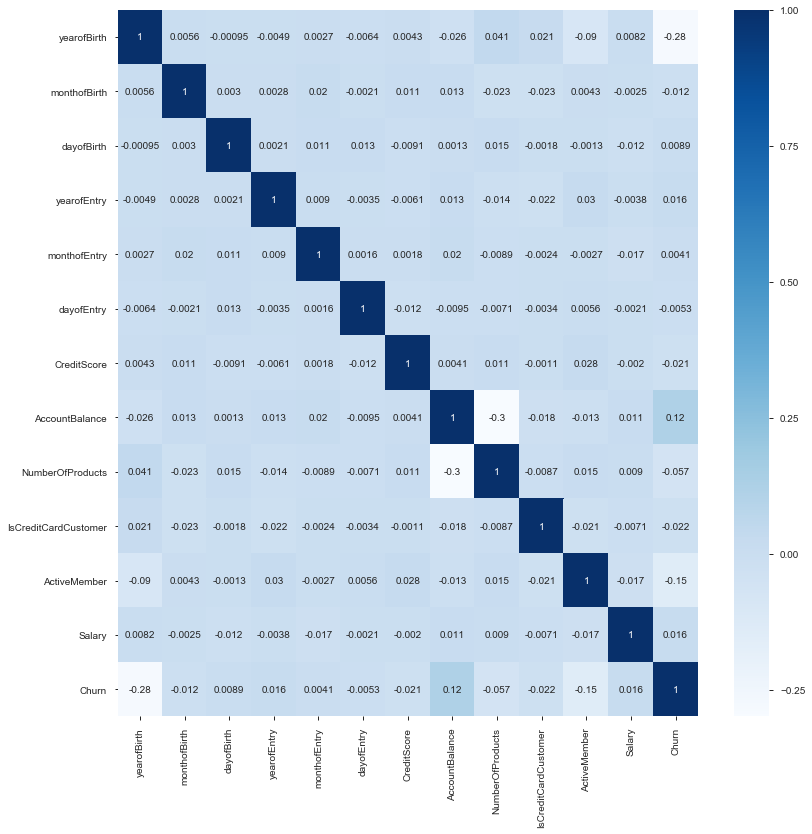

In [47]:
plt.figure(figsize=(13,13))
sns.heatmap(train_data.corr(),cmap='Blues',annot = True)
plt.show();

## Add new Feature 

In [48]:
# Add new feature
# Get the Current Year
current_year=pd.datetime.now().year
# Calculate Present Age of every customer
train_data['Age']=current_year-train_data.yearofBirth
train_data['#customer_years']=current_year-train_data.yearofEntry

test_data['Age']=current_year-test_data.yearofBirth
test_data['#customer_years']=current_year-test_data.yearofEntry

## Correlation
# After Adding feature

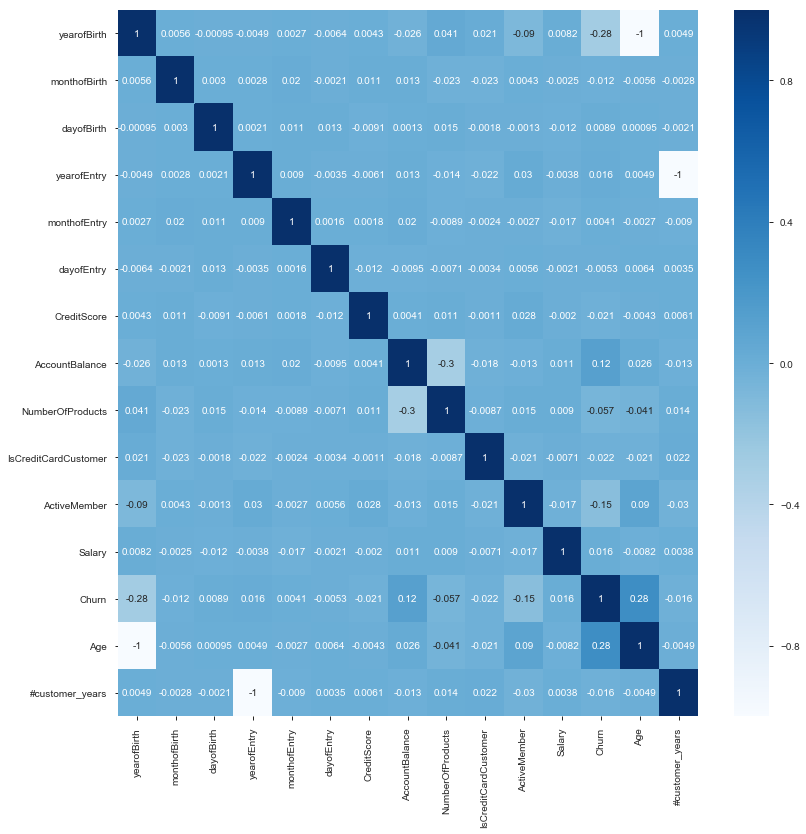

In [49]:
plt.figure(figsize=(13,13))
sns.heatmap(train_data.corr(),cmap='Blues',annot = True)
plt.show();

In [50]:
# Define categorical col and Num columns
print(train_data.dtypes)
train_data.columns

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
Age                       int64
#customer_years           int64
dtype: object


Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn', 'Age',
       '#customer_years'],
      dtype='object')

## Visualization 

# See Visualization all between catergorical column vs Target variable 'Churn'

# Visualization Points
1) There is no much variation in Chrun ratio when we compare between all Education categoies (can be drop this feature)<br>
2) Cutomer churn Ratio is high in female than male<br>
3) We can observe Location11 has more no of customer and chrun ration is less than other location, this is important feature<br>
4) Slighly Impact of Martial Status in customer Churn<br>
5) Occupation seems to be good feature to predict customer churn as no of cutomer varies as per occupation<br>
6) Ownhouse has impact on customer churn<br>

## See Visualization all between Numerical column vs Target variable 'Churn'

Text(0.5, 0, 'Credit Score')

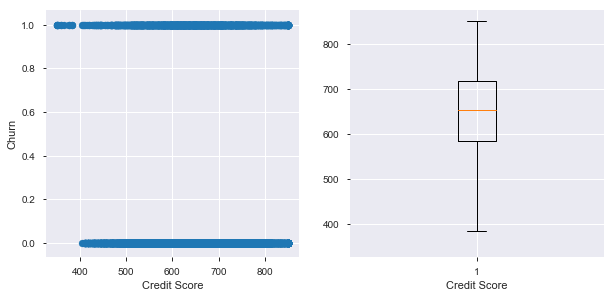

In [51]:
# Credir Score Vs Target Variabl
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(train_data.CreditScore,train_data.Churn)
plt.xlabel("Credit Score")
plt.ylabel("Churn")
plt.subplot(2,2,2)
plt.boxplot(train_data.CreditScore)
plt.xlabel("Credit Score")

#  Point-
-Below 400 credit score customer has stopped coming on bank

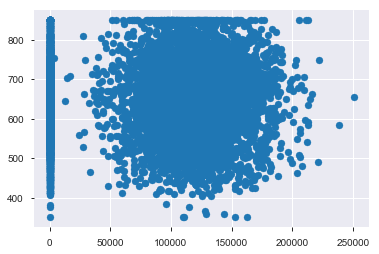

In [52]:
# See Account balance vs Credit score
plt.scatter(train_data.AccountBalance,train_data.CreditScore)
# there are few customer which has 0 account balance and less than 400 credit score

In [53]:
# Check  Churn , who has Account Balance is Zero
Ac_Bal_0=train_data[train_data.AccountBalance==0]
z=pd.crosstab(Ac_Bal_0.AccountBalance,Ac_Bal_0.Churn)
print(z)

Churn              0    1
AccountBalance           
0.0             2292  361


[below_10K, More, Between10_1LK]
Categories (3, object): [below_10K < Between10_1LK < More]

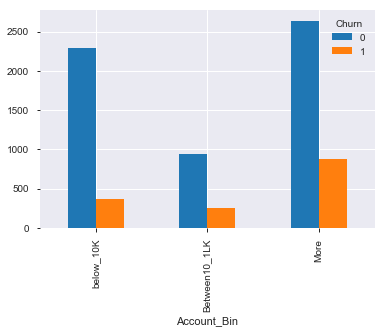

In [54]:
# create Bin for Account Balance
train_data['Account_Bin']=pd.cut(x=train_data.AccountBalance,bins=[-1,10001,100001,2600000],labels=['below_10K','Between10_1LK','More'])
pd.crosstab(train_data.Account_Bin,train_data.Churn).plot(kind='bar')

test_data['Account_Bin']=pd.cut(x=test_data.AccountBalance,bins=[-1,10001,100001,2600000],labels=['below_10K','Between10_1LK','More'])
test_data.Account_Bin.unique()

(array([713., 722., 732., 771., 756., 764., 730., 705., 753., 714.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

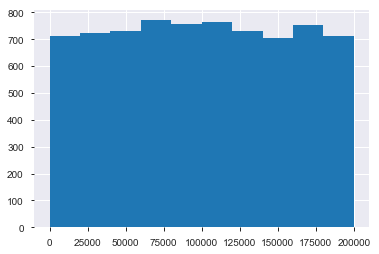

In [55]:
# See histogram for Salary
plt.hist(train_data.Salary)

[Between10K_1LK, More, below50K, Below_1000, below_10K]
Categories (5, object): [Below_1000 < below_10K < below50K < Between10K_1LK < More]

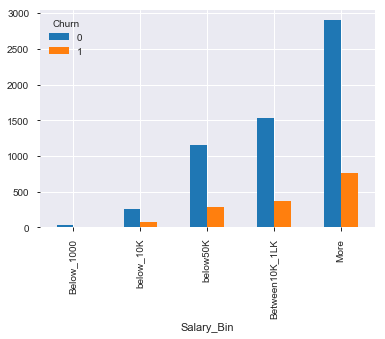

In [56]:
# create Bin for Account Balance
train_data['Salary_Bin']=pd.cut(x=train_data.Salary,bins=[-1,1000,10000,50000,100000,2600000],labels=['Below_1000','below_10K','below50K','Between10K_1LK','More'])
pd.crosstab(train_data.Salary_Bin,train_data.Churn).plot(kind='bar')

test_data['Salary_Bin']=pd.cut(x=test_data.Salary,bins=[-1,1000,10000,50000,100000,2600000],labels=['Below_1000','below_10K','below50K','Between10K_1LK','More'])
test_data.Salary_Bin.unique()

(array([ 429., 1609., 2698., 1373.,  599.,  390.,  146.,   97.,   15.,
           4.]),
 array([19. , 26.4, 33.8, 41.2, 48.6, 56. , 63.4, 70.8, 78.2, 85.6, 93. ]),
 <a list of 10 Patch objects>)

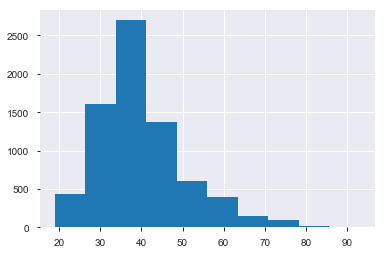

In [57]:
# Plot histogram of Customer Age
plt.hist(train_data.Age)

[Adult, old, young, very_old]
Categories (4, object): [young < Adult < old < very_old]

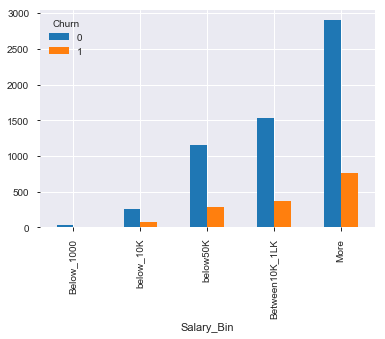

In [58]:
# create Bin for Age
train_data['Age_Bin']=pd.cut(x=train_data.Age,bins=[-1,25,50,75,100],labels=['young','Adult','old','very_old'])
pd.crosstab(train_data.Salary_Bin,train_data.Churn).plot(kind='bar')

test_data['Age_Bin']=pd.cut(x=test_data.Age,bins=[-1,25,50,75,100],labels=['young','Adult','old','very_old'])
test_data.Age_Bin.unique()

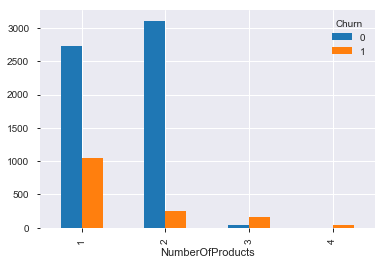

In [59]:
#Plot Graph Between NumberOfProducts vs churn
pd.crosstab(train_data.NumberOfProducts,train_data.Churn).plot(kind='bar')
# very good feature to predict Churn

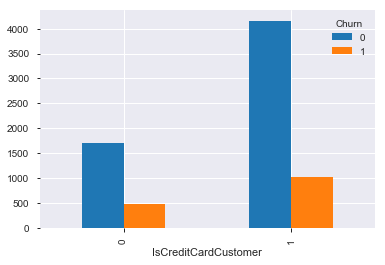

In [60]:
# See visualization between credit Card holder vs Churn
pd.crosstab(train_data.IsCreditCardCustomer,train_data.Churn).plot(kind='bar')

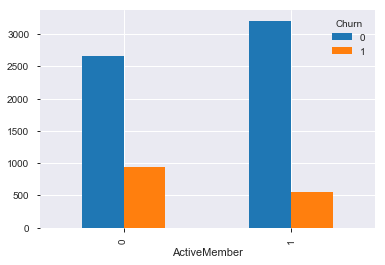

In [61]:
# See visualization between Active member vs Churn
pd.crosstab(train_data.ActiveMember,train_data.Churn).plot(kind='bar')
# its good feature If user is active member then less chnaces of churn

## Define Numerical and Catergorical column

In [62]:
train_data.columns

Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn', 'Age',
       '#customer_years', 'Account_Bin', 'Salary_Bin', 'Age_Bin'],
      dtype='object')

In [63]:
train_data.dtypes

CustomerID                object
CustomerName              object
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                    object
Location                  object
Education                 object
MaritalStatus             object
Occupation                object
Ownhouse                  object
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer       int64
ActiveMember               int64
Salary                   float64
Churn                      int64
Age                        int64
#customer_years            int64
Account_Bin             category
Salary_Bin              category
Age_Bin                 category
dtype: object

In [65]:
num_col=['CreditScore','NumberOfProducts','IsCreditCardCustomer', 'ActiveMember','#customer_years']
drop_col=['CustomerID','CustomerName','yearofBirth','monthofBirth','dayofBirth','yearofEntry','monthofEntry','dayofEntry','AccountBalance','Salary','Age']
target_col=['Churn']
cat_col_train=train_data.columns.difference(num_col+drop_col+target_col)
cat_col_test=test_data.columns.difference(num_col+drop_col)
print(cat_col_train)
print(cat_col_test)

Index(['Account_Bin', 'Age_Bin', 'Education', 'Gender', 'Location',
       'MaritalStatus', 'Occupation', 'Ownhouse', 'Salary_Bin'],
      dtype='object')
Index(['Account_Bin', 'Age_Bin', 'Education', 'Gender', 'Location',
       'MaritalStatus', 'Occupation', 'Ownhouse', 'Salary_Bin'],
      dtype='object')


<Figure size 1080x1080 with 0 Axes>

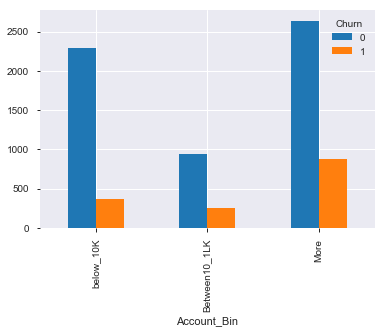

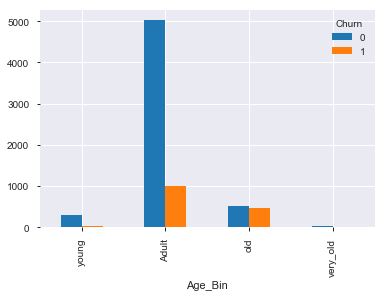

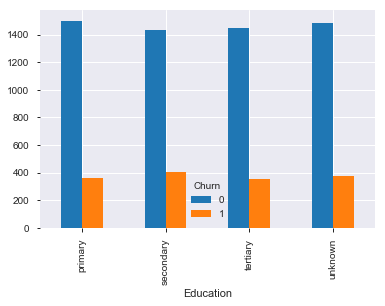

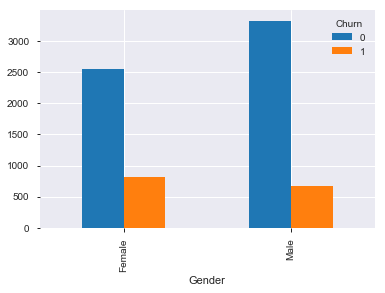

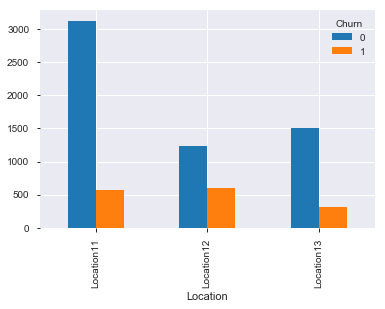

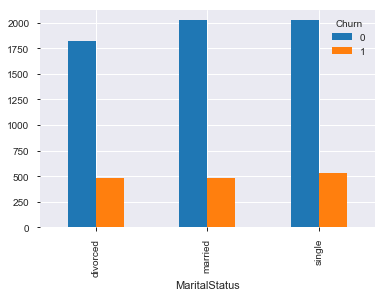

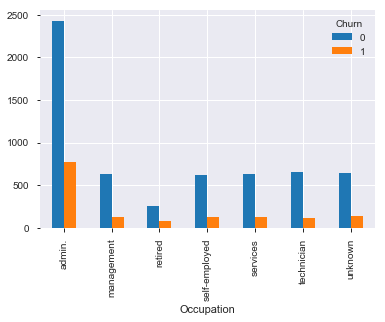

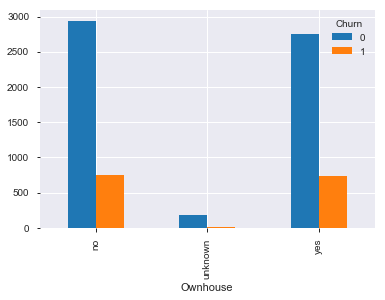

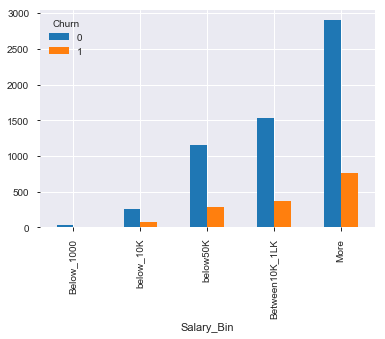

In [66]:
plt.figure(figsize=(15,15))
for i in range(0,len(cat_col_train)):
    X=pd.crosstab(train_data[cat_col_train[i]],train_data.Churn)
    X.plot(kind='bar')
    plt.show()

## Imputation

In [67]:
def Imputation(data=None,num_col=[],cat_col=[],num_strategy='mean',cat_strategy='most_frequent',drop_cols=[] ,drop_only=False):
    data=data.drop(columns=drop_col,axis=1)
    if(drop_only == False) :
        if(len(data)>0):
            # Drop features
            data=data.drop(columns=drop_col,axis=1)
            # Impute numerical column
            imp = SimpleImputer(missing_values=np.nan, strategy=num_strategy)
            data.loc[:,num_col] = pd.DataFrame(imp.fit_transform(data.loc[:,num_col]),columns=num_col)

            # Categorical columns imputation
            imp = SimpleImputer(missing_values=np.nan, strategy=cat_strategy)
            data.loc[:,cat_col]  = pd.DataFrame(imp.fit_transform(data.loc[:,cat_col] ),columns=cat_col)
        return data
    return data

In [68]:
# Impute train data
train_data=Imputation(data=train_data,num_col=num_col,cat_col=cat_col_train,drop_cols=drop_col,drop_only=True)
# Impute train data
test_data=Imputation(data=test_data,num_col=num_col,cat_col=cat_col_test,drop_cols=drop_col,drop_only=True)

In [69]:
print(train_data.shape)
print(test_data.shape)
#train_data.dtypes

(7360, 15)
(1840, 14)


# test train Split

In [70]:
X=train_data.copy().drop(columns=['Churn'],axis=1)
Y=train_data['Churn']    
X_train,X_validation,y_train,y_validation=train_test_split(X,Y,test_size=0.3,random_state=101)

In [71]:
print(X_train.shape)
print(X_validation.shape)

(5152, 14)
(2208, 14)


## standardization On Train ,validation and Test 

In [72]:
# Standarize
def scale_num_col(test=None,train=None,n_col=[],train_flag=True):
    std=StandardScaler()
    std.fit(train)
    if(train_flag==True):
        return pd.DataFrame(std.transform(train),columns=n_col)
    return pd.DataFrame(std.transform(test),columns=n_col)

In [73]:
cat_col=X_train.columns.difference(num_col)
X_train=X_train.reset_index(drop=True)
num_data = X_train.loc[:,num_col]
cat_data = X_train.loc[:,cat_col]
num_data1=scale_num_col(train=num_data,n_col=num_col,train_flag=True)
X_train=pd.concat([num_data1,cat_data],axis=1,ignore_index=False)

print(X_train.shape)
X_validation=X_validation.reset_index(drop=True)
num_data_val = X_validation.loc[:,num_col]
cat_data_val = X_validation.loc[:,cat_col]
num_data_val1=scale_num_col(test=num_data_val,train=num_data,n_col=num_col,train_flag=False)
X_validation = pd.concat([num_data_val1,cat_data_val],axis=1,ignore_index=False)
print(X_validation.shape)

test_data=test_data.reset_index(drop=True)
num_data_test = test_data.loc[:,num_col]
cat_data_test = test_data.loc[:,cat_col]
num_data_test=scale_num_col(test=num_data_test,train=num_data,n_col=num_col,train_flag=False)
test_data = pd.concat([num_data_test,cat_data_test],axis=1,ignore_index=False)
print(test_data.shape)

(5152, 14)
(2208, 14)
(1840, 14)


## Dummification

In [74]:
X_train=pd.get_dummies(data=X_train,columns=cat_col_test,drop_first=True)
X_validation=pd.get_dummies(data=X_validation,columns=cat_col_test,drop_first=True)
test_data=pd.get_dummies(data=test_data,columns=cat_col_test,drop_first=True)

In [75]:
print(X_train.shape)
print(X_validation.shape)
print(test_data.shape)

(5152, 30)
(2208, 30)
(1840, 30)


In [ ]:
X_train.describe(include='all')

## Logistic Reg

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1764
           1       0.75      0.24      0.36       444

   micro avg       0.83      0.83      0.83      2208
   macro avg       0.79      0.61      0.63      2208
weighted avg       0.82      0.83      0.79      2208



([0.1825242718446602,
  0.1669902912621359,
  0.17022653721682848,
  0.17718446601941748,
  0.18051242236024845,
  0.17793594306049823,
  0.17748197448696618,
  0.17811210871147778,
  0.17644521138912855,
  0.17895962732919254],
 [0.1838768115942029,
  0.17391304347826086,
  0.17119565217391305,
  0.16847826086956522,
  0.17028985507246377,
  0.17028985507246377,
  0.1693840579710145,
  0.17074275362318841,
  0.17028985507246377,
  0.1693840579710145])

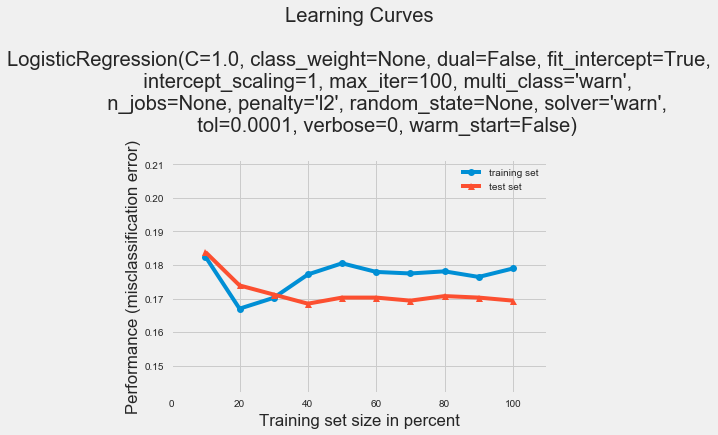

In [155]:
lnr = LogisticRegression()
lnr.fit(X_train,y_train)
pred_train = lnr.predict(X_train)
pred_val = lnr.predict(X_validation)
#pred_test=lnr.predict(test_data)
#print(pred_test)
#train_f1=f1_score(y_train,pred_train)
#val_f1=f1_score(y_validation,pred_val)
#val_recall=recall_score(y_validation,pred_val)
#train_recall=recall_score(y_train,pred_train)
#acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
#print("Accuracy :",acc)
#df=pd.DataFrame({'ActualTrain': y_validation, 'PredictedTrain':pred_val})
#df.head(20)
plot_learning_curves(X_train, y_train, X_validation, y_validation, lnr)

## XGB Boost

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1764
           1       0.61      0.40      0.49       444

   micro avg       0.83      0.83      0.83      2208
   macro avg       0.74      0.67      0.69      2208
weighted avg       0.81      0.83      0.81      2208

0.8278985507246377


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.3490990990990991,
  0.36486486486486486,
  0.34684684684684686,
  0.3783783783783784,
  0.3761261261261261,
  0.3716216216216216,
  0.41216216216216217,
  0.39864864864864863,
  0.3963963963963964,
  0.40315315315315314])

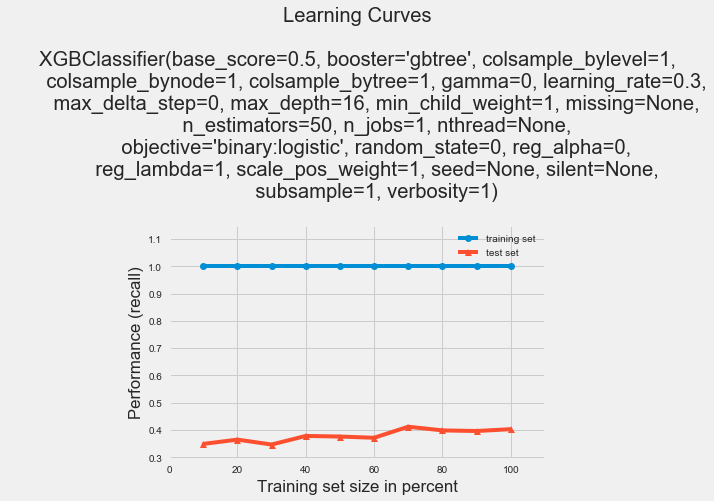

In [161]:
xgb_model=XGBClassifier(learning_rate=0.3,max_depth=16,n_estimators=50)
xgb_model.fit(X_train,y_train)
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_validation)
acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
print(acc)
plot_learning_curves(X_train, y_train, X_validation, y_validation, xgb_model,scoring='recall')

## XGBoost with grid Search

In [ ]:
xbg_model=XGBClassifier()
param_grid = {"max_depth" : [12,14,16,18,20],
              "learning_rate":[0.001,0.01,0.1,0.2,0.3],
              'colsample_bytree': np.linspace(0.5, 0.9, 5),
              'n_estimators':[100, 200],
             }

xgb_cv_grid = GridSearchCV(estimator = xbg_model, param_grid = param_grid,cv=3,scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))
xgb_cv_grid.fit(X_train,y_train)

In [157]:
print(xgb_cv_grid.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1764
           1       0.80      0.42      0.55       444

   micro avg       0.86      0.86      0.86      2208
   macro avg       0.83      0.70      0.73      2208
weighted avg       0.86      0.86      0.84      2208

0.8618659420289855


([0.7455621301775147,
  0.6791277258566978,
  0.6446280991735538,
  0.6277602523659306,
  0.6311970979443774,
  0.6185567010309279,
  0.6171132238547969,
  0.5950540958268933,
  0.6032171581769438,
  0.5942028985507246],
 [0.5227606461086638,
  0.5451895043731777,
  0.5278592375366569,
  0.5529411764705883,
  0.5518248175182482,
  0.5668604651162791,
  0.581294964028777,
  0.5601173020527859,
  0.5576642335766423,
  0.5494830132939439])

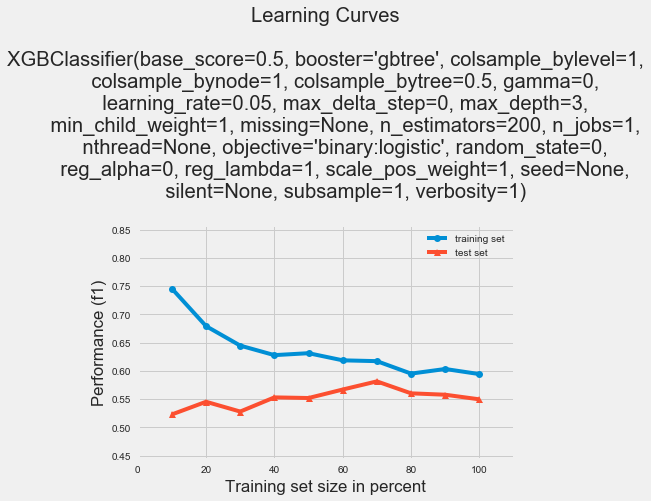

In [158]:
xgb_model=XGBClassifier(learning_rate=0.05,max_depth=3,n_estimators=200,colsample_bytree=0.5)
xgb_model.fit(X_train,y_train)
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_validation)
acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
print(acc)
plot_learning_curves(X_train, y_train, X_validation, y_validation, xgb_model,scoring='f1')

## Random Forest

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1764
           1       0.52      0.56      0.54       444

   micro avg       0.81      0.81      0.81      2208
   macro avg       0.70      0.71      0.71      2208
weighted avg       0.81      0.81      0.81      2208

0.8066123188405797


([0.8666666666666667,
  0.8606965174129353,
  0.8453947368421053,
  0.8427518427518428,
  0.8246628131021194,
  0.8341463414634146,
  0.8441379310344828,
  0.8309002433090025,
  0.8189563365282215,
  0.8244274809160306],
 [0.43243243243243246,
  0.46396396396396394,
  0.45495495495495497,
  0.5157657657657657,
  0.5427927927927928,
  0.5608108108108109,
  0.581081081081081,
  0.5653153153153153,
  0.5675675675675675,
  0.5833333333333334])

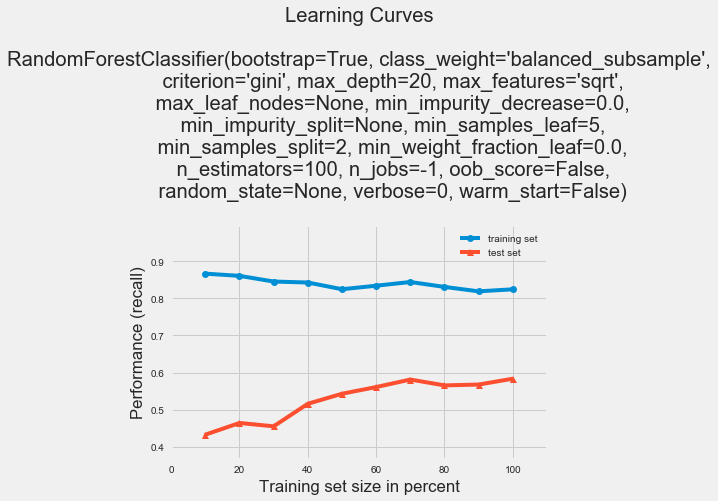

In [83]:

rf_model= RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='gini', max_depth=20, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1, oob_score=False, random_state=None, verbose=0, warm_start=False)
rf_model.fit(X_train,y_train)
pred_train = rf_model.predict(X_train)
pred_val = rf_model.predict(X_validation)
pred_test=rf_model.predict(test_data)
acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
print(acc)
plot_learning_curves(X_train, y_train, X_validation, y_validation, rf_model,scoring='recall')

In [183]:
print("\n\nTrain data f1-score for class '1'",recall_score(y_train,pred_train,pos_label=1))
### Test data accuracy
print("\n\nTest data f1-score for class '1'",recall_score(y_validation,pred_val,pos_label=1))



Train data f1-score for class '1' 0.8788167938931297


Test data f1-score for class '1' 0.6328828828828829


In [173]:
submission_file_1=pd.read_csv("samplesubmission.csv")

In [176]:
submission_file_1['Churn'] = pred_test
print(submission_file_1.Churn.value_counts())
submission_file_1['Churn']=submission_file_1['Churn'].replace(0,"No")
submission_file_1['Churn']=submission_file_1['Churn'].replace(1,"Yes")
submission_file_1.head()
submission_file_1.to_csv('B67_3067_Tarun_rastogi_Mith_Submit01.csv')

0    1442
1     398
Name: Churn, dtype: int64


# # Random forest with Grid Search

In [207]:
rfc_grid=RandomForestClassifier()
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
                 "max_depth" : [10, 12, 14, 16],
                 "min_samples_leaf" : [5, 10, 15, 20],
                 "class_weight" : ['balanced','balanced_subsample']}

rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid,cv=5,scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))

In [208]:
rfc_cv_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [10, 12, 14, 16, 18, 20], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(<lambda>), verbose=0)

In [209]:
rfc_cv_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'n_estimators': 100}

In [210]:
rfc_cv_grid.best_score_

0.6984761053891081

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1764
           1       0.46      0.65      0.54       444

   micro avg       0.78      0.78      0.78      2208
   macro avg       0.68      0.73      0.70      2208
weighted avg       0.81      0.78      0.79      2208



Train data recall for class '1' 0.7395038167938931


Test data recall for class '1' 0.6486486486486487


([0.8,
  0.7313432835820896,
  0.7401315789473685,
  0.7567567567567568,
  0.7360308285163777,
  0.7447154471544716,
  0.7531034482758621,
  0.745742092457421,
  0.7550585729499467,
  0.7414122137404581],
 [0.5427927927927928,
  0.5540540540540541,
  0.5472972972972973,
  0.6103603603603603,
  0.6576576576576577,
  0.6396396396396397,
  0.6644144144144144,
  0.6599099099099099,
  0.6531531531531531,
  0.6441441441441441])

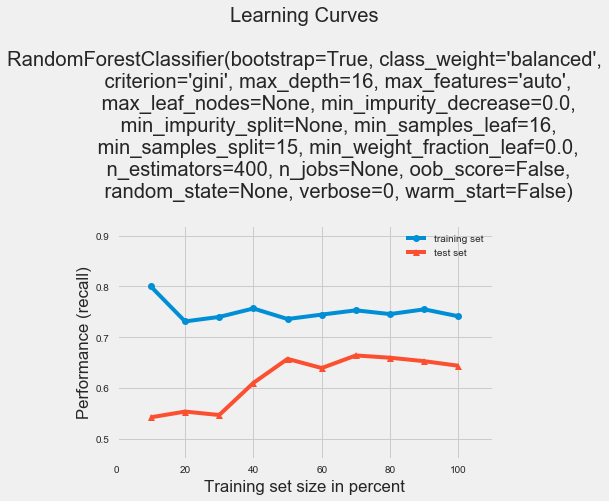

In [101]:
rf_model=RandomForestClassifier(class_weight='balanced',max_depth=16,min_samples_leaf=16,n_estimators=400,min_samples_split=15)
rf_model.fit(X_train,y_train)
pred_train = rf_model.predict(X_train)
pred_val = rf_model.predict(X_validation)
pred_test=rf_model.predict(test_data)
print(classification_report(y_validation,pred_val))
print("\n\nTrain data recall for class '1'",recall_score(y_train,pred_train,pos_label=1))
### Test data accuracy
print("\n\nTest data recall for class '1'",recall_score(y_validation,pred_val,pos_label=1))
plot_learning_curves(X_train, y_train, X_validation, y_validation, rf_model,scoring='recall')

In [226]:
submission_file_2=pd.read_csv("samplesubmission.csv")
submission_file_2['Churn'] = pred_test
print(submission_file_2.Churn.value_counts())
submission_file_2['Churn']=submission_file_2['Churn'].replace(0,"No")
submission_file_2['Churn']=submission_file_2['Churn'].replace(1,"Yes")
submission_file_2.head()
submission_file_2.to_csv('B67_3067_Tarun_rastogi_Mith_Submit02.csv')

0    1335
1     505
Name: Churn, dtype: int64


In [187]:
rf_model.feature_importances_

array([0.08267158, 0.10939415, 0.16882091, 0.01098662, 0.04708935,
       0.08223531, 0.26985556, 0.04873236, 0.01136917, 0.01155868,
       0.01121064, 0.01722328, 0.04185159, 0.01165422, 0.01047876,
       0.01291608, 0.00537697, 0.00655557, 0.00451516, 0.00617246,
       0.0058688 , 0.0058925 , 0.00412351, 0.01344677])

In [188]:
## Get important Features
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)

In [189]:
feat_importances_ordered = feat_importances.nlargest(n=10)
feat_importances_ordered

Age                    0.269856
NumberOfProducts       0.168821
AccountBalance         0.109394
CreditScore            0.082672
Salary                 0.082235
#customer_years        0.048732
ActiveMember           0.047089
Location_Location12    0.041852
Gender_Male            0.017223
Ownhouse_yes           0.013447
dtype: float64

## SVM

In [ ]:
## Build a SVM Classifier
## Create an SVC object and print it to see the default arguments
svc = SVC()
param_grid ={"C" : [1,0.1,0.001,10,0.5,0.8],
             "kernel":['rbf','linear'],
              "gamma":[0.1,0.2,0.3,0.4,0.5],
            "class_weight" : ['balanced','balanced_subsample']
             }

svm_cv_grid = GridSearchCV(estimator = svc, param_grid = param_grid,cv=3,scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))
svm_cv_grid.fit(X_train,y_train)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1764
           1       0.61      0.46      0.53       444

   micro avg       0.83      0.83      0.83      2208
   macro avg       0.74      0.69      0.71      2208
weighted avg       0.82      0.83      0.82      2208

Confusion Matrix : 
 [[1635  129]
 [ 240  204]]


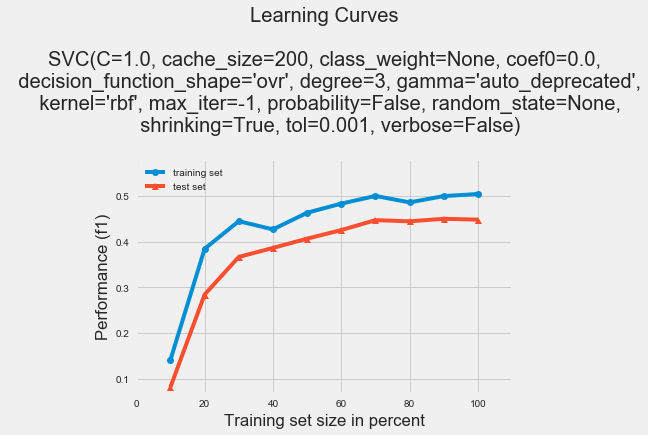

In [198]:
print(svm_cv_grid.best_params_)
svm_cv_grid.best_estimator_.fit(X_train,y_train)
pred_train = svm_cv_grid.best_estimator_.predict(X_train)
pred_val = svm_cv_grid.best_estimator_.predict(X_validation)
#pred_test= svc.predict(test_data)
#acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
#print("Accuracy :",acc)
print("Confusion Matrix : \n",confusion_matrix(y_validation,pred_val))
plot_learning_curves(X_train, y_train, X_validation, y_validation, svc,scoring='f1')
#fpr, tpr, thresholds=roc_curve(y_validation,pred_val)
#plt.plot(fpr, tpr)